In [1]:
# I have downloaded the dataset from Youtube for a perticular video "https://www.youtube.com/watch?v=bk-nQ7HF6k4": Comments.
# I had used this dataset for a final project in Deep Learning for sentiment analysis on youtube comments last sem.

import pandas as pd
df = pd.read_csv('The_Dangers_Of_AI.csv')

In [2]:
df.head(10)

,comment_id,comment,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts
0,UgxRNRfy58W4Z5XzyNh4AaABAg,"Mo is back, and this is honestly a conversatio...",http://www.youtube.com/channel/UCGq-a57w-aPwyi...,@TheDiaryOfACEO,498,3814,2023-06-01T07:24:06Z,bk-nQ7HF6k4,498
1,Ugz3_UytFedYlrJkcg14AaABAg,"AI can indeed become self-aware, but it will n...",http://www.youtube.com/channel/UCO8wv8cMVvRBeq...,@buckfuckem7056,0,0,2023-12-05T05:00:39Z,bk-nQ7HF6k4,0
2,Ugy_pG9P7q935ZZE4uJ4AaABAg,Just seeing this. Very much appreciate the in...,http://www.youtube.com/channel/UC2EVnHHC-S7lmn...,@lisabenoit5147,1,0,2023-12-05T04:21:10Z,bk-nQ7HF6k4,1
3,UgwYRh_G6dGD78djlRN4AaABAg,This guy is the poster child for being smart d...,http://www.youtube.com/channel/UCiyiT2kMm2V2mY...,@mrstatictunes,0,0,2023-12-05T03:11:15Z,bk-nQ7HF6k4,0
4,Ugwdmv6axlLvL8qGyph4AaABAg,I was AI once but now I AM a real boy!,http://www.youtube.com/channel/UCNZJ7TzCidgXYU...,@blahblahblah-fw9vr,0,0,2023-12-05T00:52:16Z,bk-nQ7HF6k4,0
5,UgwdKO1JHrSgu9Xuesh4AaABAg,"its not chat GTP mf keeps on saying ""CHAT GTP""",http://www.youtube.com/channel/UCLBz4RP-MxKnO0...,@sakshamvasudeva8073,0,0,2023-12-05T00:27:47Z,bk-nQ7HF6k4,0
6,Ugz0WeAfwbkbFNLOYYl4AaABAg,WHY HE SOUNDS LIKE AN AI,http://www.youtube.com/channel/UCLBz4RP-MxKnO0...,@sakshamvasudeva8073,0,0,2023-12-05T00:15:29Z,bk-nQ7HF6k4,0
7,Ugz9oXfVuZ0sBZfwKoZ4AaABAg,This is how child would describe it. After com...,http://www.youtube.com/channel/UCDEKdQOAG7I2Dx...,@Hbmd3E,0,0,2023-12-04T22:48:31Z,bk-nQ7HF6k4,0
8,UgyBz2RJOvOW2MZkO6p4AaABAg,So AI is worse than climate change... So AI is...,http://www.youtube.com/channel/UCPP7O-MxUI0Ssi...,@GabrielScindian,0,0,2023-12-04T22:01:58Z,bk-nQ7HF6k4,0
9,UgzZhfIFLXF0r0KnreR4AaABAg,34:48 cannot reproduce the same energy that a ...,http://www.youtube.com/channel/UCtL8-TP26vnFol...,@joadeyace1102,0,0,2023-12-04T16:43:20Z,bk-nQ7HF6k4,0


In [3]:
# natural language processing: re for regex, unicodedata, nltk for cleaning the data, stop words list that we want to ignore.
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['CHAT GTP']

In [4]:
# For visualizing the results.
import matplotlib.pyplot as plt

In [5]:
import nltk

# Download the WordNet resource : NLTK library is missing necessary for processing the words in the text and was not available before
nltk.download('wordnet')

# Download the OMW resource : NLTK library is missing the Open Multilingual Wordnet (OMW) resource.
nltk.download('omw-1.4')

def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
words = basic_clean(''.join(str(df['comment'].tolist())))


In [7]:
words[:20]

['mo',
 'back',
 'honestly',
 'conversation',
 'missed',
 'please',
 'share',
 'like',
 'help',
 'conversation',
 'reach',
 'many',
 'people',
 'hope',
 'enjoy',
 'appreciate',
 'ai',
 'indeed',
 'become',
 'selfaware']

In [8]:
# Finding which of the bigrams occured the most in particular sample of tweets.

(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(climate, change)             1174
(artificial, intelligence)     380
(dont, know)                   235
(ai, would)                    221
(human, being)                 221
(chat, gpt)                    201
(ai, could)                    191
(year, ago)                    188
(global, warming)              188
(human, race)                  187
dtype: int64

In [9]:
# # Finding which of the trigram occured the most

(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(worse, climate, change)     71
(bigger, climate, change)    68
(bring, child, world)        68
(dont, bring, child)         63
(saying, chat, gtp)          36
(make, world, better)        36
(billion, time, smarter)     36
(climate, change, hoax)      33
(ai, akashic, record)        33
(bring, child, ai)           33
dtype: int64

In [10]:
# Saving the results of Bigram and Trigram to a variable for future use.

bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

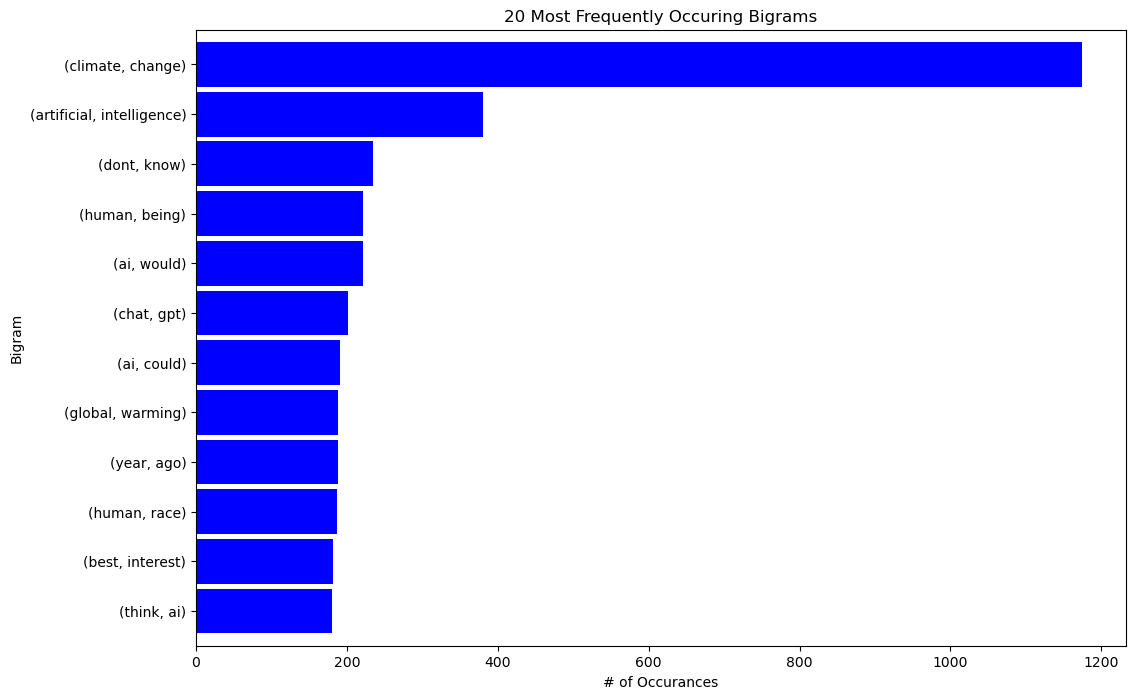

In [11]:
# Horizontal Bar Chart for Frequently Occuring Bigram words.

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')